In [319]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm
import numpy as np
import matplotlib as mpl
import os
import shutil
import seaborn as sns
import sys
import locale
%matplotlib inline

In [18]:
import sys
print(sys.getdefaultencoding())
print(sys.stdin.encoding)
print(sys.stdout.encoding)
import locale
print(locale.getpreferredencoding())

utf-8
cp949
UTF-8
cp949


In [308]:
def get_apt_information(start_year, end_year, code="F", apart_name = ""):
    """
    아파트 매매 및 분양 매매를 크롤링 하는 함수입니다.
    
    start_year, end_year: ex) 2005~2007 년도 설정
    
    code: default는 F로 분양 매매로 설정, A는 아파트 매매
    
    apart_name: 아직 미완성 기능
    
    """
    
    if code == "F":
        df = pd.DataFrame(columns=[
                "APTFNO", 
                "BLDG_AREA", 
                "BLDG_CD", 
                "BLDG_NM", 
                "BOBN", 
                "BUILD_YEAR", 
                "DEAL_DD", 
                "DEAL_MM", 
                "DEAL_YEAR", 
                "RIGHT_AMT", # 분양권매매만 RIGHT_AMT가 존재함
                "SUM_AMT"
            ])

    elif code == "A":
        df = pd.DataFrame(columns=[
                "APTFNO", 
                "BLDG_AREA",
                "BLDG_CD", 
                "BLDG_NM", 
                "BOBN", 
                "BUILD_YEAR", 
                "DEAL_DD", 
                "DEAL_MM", 
                "DEAL_YEAR", 
                "SUM_AMT"
            ])
        
    url = "http://rt.molit.go.kr/srh/getListAjax.do"
    headers = {"Host":" rt.molit.go.kr",
               "User-Agent":" Mozilla/5.0 (Windows NT 6.1; WOW64; rv:46.0) Gecko/20100101 Firefox/46.0",
               "Accept":" application/json, text/javascript, */*; q=0.01",
               "Accept-Language":" ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3",
               "Accept-Encoding":" gzip, deflate",
               "Content-Type":" application/x-www-form-urlencoded; charset=UTF-8",
               "X-Requested-With":" XMLHttpRequest",
               "Referer":" http://rt.molit.go.kr/idx/main.do",
               "Content-Length":"275",
               "Cookie":" ROUTEID=.HTTP1; JSESSIONID=9696B0A8C4643BE52131092DD7816B28",
               "Connection":" keep-alive"
              }
    
    for year in range(start_year, end_year+1):
        for period in range(1,5):
            data = {
                "reqPage":"IDX",
                "menuGubun": code,
                "srhType":"LOC",
                "houseType":1,
                "srhYear":year,
                "srhPeriod": period,           #분기
                "gubunCode":"LAND",
                "sidoCode":28,           #인천광역시
                "gugunCode":28185,       #연수구
                "dongCode":2818510600,   #송도동
                "chosung":"",
                "roadCode":"",
                "danjiCode":"",
                "rentAmtType":3,
                "fromAmt1":"",
                "toAmt1":"",
                "fromAmt2":"",
                "toAmt2":"",
                "fromAmt3":"",
                "toAmt3":"",
                "areaCode":"",
                "jimokCode":"",
                "useCode":"",
                "useSubCode":"",
                "jimokCode":"",
                "useCode":"",
                "useSubCode":""
               }
            
            response = requests.post(url, data=data, headers=headers)
            all_data = json.loads(response.text)["jsonList"]
            
            for apart_data in all_data:
                for i in range(1,4):
                    if code == "F":
                        if len(apart_data["month"+str(i)+"List"]) != 0:
                            for data in apart_data["month"+str(i)+"List"]:
                                df.loc[len(df)] = [
                                    int(data["APTFNO"]), 
                                    data["BLDG_AREA"], 
                                    data["BLDG_CD"], 
                                    data["BLDG_NM"], 
                                    data["BOBN"], 
                                    data["BUILD_YEAR"], 
                                    int(data["DEAL_DD"].split("~")[0]), 
                                    int(data["DEAL_MM"]), 
                                    int(year),  
                                    data["RIGHT_AMT"].replace(",",""),
                                    data["SUM_AMT"].replace(",","")
                                ]
                    if code == "A":
                        if len(apart_data["month"+str(i)+"List"]) != 0:
                            for data in apart_data["month"+str(i)+"List"]:
                                df.loc[len(df)] = [
                                    int(data["APTFNO"]), 
                                    data["BLDG_AREA"], 
                                    data["BLDG_CD"], 
                                    data["BLDG_NM"], 
                                    data["BOBN"], 
                                    data["BUILD_YEAR"], 
                                    int(data["DEAL_DD"].split("~")[0]), 
                                    int(data["DEAL_MM"]), 
                                    int(year),  
                                    data["SUM_AMT"].replace(",","")
                                ]
                       
    df.to_csv("./apart_data/{name}.csv".format(name = "apart" if code == "A" else "bunyang"))
              
    print(df.head)

In [326]:
get_apt_information(2006,2016,code="A")

b'ok'
<bound method NDFrame.head of       APTFNO  BLDG_AREA   BLDG_CD       BLDG_NM   BOBN BUILD_YEAR  DEAL_DD  \
0        1.0      84.89  20009224       송도금호어울림   3-38       2005      1.0   
1        8.0      84.89  20009224       송도금호어울림   3-38       2005     11.0   
2        2.0     148.97  20009224       송도금호어울림   3-38       2005     11.0   
3       13.0      84.72  20009222    송도풍림아이원1단지    2-7       2005     11.0   
4        5.0      84.72  20009222    송도풍림아이원1단지    2-7       2005     11.0   
5        7.0      84.72  20009222    송도풍림아이원1단지    2-7       2005     11.0   
6        1.0      84.72  20009222    송도풍림아이원1단지    2-7       2005     21.0   
7       13.0      84.72  20009222    송도풍림아이원1단지    2-7       2005      1.0   
8        8.0      84.72  20009222    송도풍림아이원1단지    2-7       2005      1.0   
9        9.0      84.72  20009222    송도풍림아이원1단지    2-7       2005     21.0   
10       3.0      84.91  20009222    송도풍림아이원1단지    2-7       2005     11.0   
11       7.0      84.91  200

In [127]:
def korean_to_english(x): # 한글을 영어로 변환
    with open("./transform.csv", "r") as f:
        transform = {i.split(",")[0]: i.split(",")[1].strip() for i in f.readlines()}
        list_x = [i for i in x]
        string = ""
        for i in list_x:
            try:
                string += transform[i]
            except:
                string += str(i)
        return string

In [324]:
def apart_plot(apart_list=[], bunyang_list=[]):
    color_list=["r","g","b","c","m","y","k","w"]
    plt.figure(figsize=(16,8))
    plt.xticks([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
    plt.title("Apart & Bunyang")

    # 예측용 함수를 만들기 위한 df만들기(미완성)
#     global apart_plot_df 
#     apart_plot_df = np.array([[0,0,0]])
    
    for i, name_list in enumerate([apart_list, bunyang_list]): # 아파트 리스트와 분양 리스트를 따로 for문을 돈다
        all_apart = pd.read_csv("./apart_data/"+os.listdir("./apart_data")[i+1], encoding=sys.stdin.encoding)
        
        for j, apart_name in enumerate(name_list):
            apart = all_apart[all_apart["BLDG_NM"] == apart_name].copy()
            if len(apart):
                apart["AMT"] = apart["SUM_AMT"] / apart["BLDG_AREA"] # 평당가
                apart["groupby"] = apart["DEAL_YEAR"].apply(lambda x: str(x))\
                                    + apart["BLDG_AREA"].apply(lambda x: str(x)) # groupby 기준 => 년도,평당별
                apart["total_mean"] = apart["groupby"].apply(lambda x: apart.groupby("groupby").mean()["AMT"][x]) # total_mean에 groupby한 가격의 평균을 각각 입력
                apart["percent"] = apart["AMT"] / apart["total_mean"] # 원래 평당가 / 해당 년도 같은 평수의 평균 평당가
                apart = apart[apart["APTFNO"] > 5] # 1~5층 제거
#                 apart = apart[apart["DEAL_YEAR"] > 2006] # 2006년 제거
#                 apart = apart[apart["BLDG_AREA"] < 140] # 120이하로 일반화

                apart.reset_index(inplace=True)

                # 모델 생성
                model = sm.OLS.from_formula("percent ~ C(APTFNO)", data=apart)
                result = model.fit()

                # 아웃라이어 제거
                influence = result.get_influence()
                cooks_d2, pvals = influence.cooks_distance
                fox_cr = 4/ (len(apart) - 2)
                idx = np.where(cooks_d2 > fox_cr)[0]
                apart.drop(idx, inplace=True)

                # GROUP BY를 통해 YEAR_MEAN값 만들기
                apart["YEAR_MEAN"] = apart["DEAL_YEAR"].apply(lambda x: apart.groupby("DEAL_YEAR").mean()["AMT"][x]) # 년도별 평균

                # 예측용 함수를 만들기 위한 df만들기(미완성)
#                 if i == 0:
#                     apart_df = np.vstack([
#                             apart["DEAL_YEAR"].unique(), 
#                             apart.groupby("DEAL_YEAR").mean()["YEAR_MEAN"], 
#                             np.ones(len(apart["DEAL_YEAR"].unique())) * j]).T
#                     apart_plot_df = np.vstack([apart_plot_df, apart_df])

                # 그래프 그리기
                plt.plot(
                    apart["DEAL_YEAR"].unique(), 
                    apart.groupby("DEAL_YEAR").mean()["YEAR_MEAN"],
                    ls = "-" if i == 0 else "--",
                    c=color_list[j],
                    label="",
                )
                plt.hold(True)
                plt.scatter(
                    apart["DEAL_YEAR"].unique(), 
                    apart.groupby("DEAL_YEAR").mean()["YEAR_MEAN"],
                    c=color_list[j], 
                    label=korean_to_english(apart_name) if i == 0 else ""
                )
                plt.legend()
    

C:\Anaconda2\envs\py3k\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


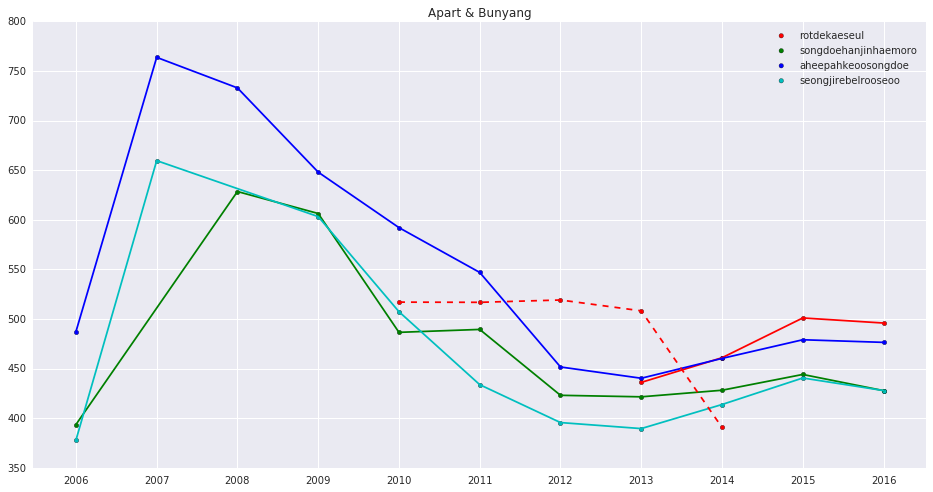

In [325]:
apart_plot(["롯데캐슬", "송도한진해모로", "아이파크송도", "성지리벨루스"],["롯데캐슬"])